 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [42]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns and creating data frame
whale_dataframe = pd.read_csv("resources/whale_returns.csv")
whale_dataframe.set_index(pd.to_datetime(whale_dataframe["Date"], infer_datetime_format=True), inplace=True)
whale_dataframe.drop(columns=["Date"], inplace=True)

In [3]:
# Count nulls
whale_dataframe.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls and verifying no nulls left
whale_dataframe.dropna(inplace=True)
whale_dataframe.isnull().sum()
whale_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_dataframe = pd.read_csv("resources/algo_returns.csv")
algo_dataframe.set_index(pd.to_datetime(algo_dataframe["Date"], infer_datetime_format=True), inplace=True)
algo_dataframe.drop(columns=["Date"], inplace=True)

In [6]:
# Count nulls
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls and verifying no nulls left
algo_dataframe.dropna(inplace=True)
algo_dataframe.isnull().sum()
algo_dataframe

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sandp_dataframe = pd.read_csv("resources/sp500_history.csv")
sandp_dataframe.set_index(pd.to_datetime(sandp_dataframe["Date"], infer_datetime_format=True), inplace=True)
sandp_dataframe.drop(columns=["Date"], inplace=True)

In [9]:
# Check Data Types
sandp_dataframe.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sandp_dataframe['Close'] = sandp_dataframe['Close'].str.replace("$", "")
sandp_dataframe['Close'] = sandp_dataframe['Close'].astype('float')
sandp_dataframe.dtypes

C:\Users\ItJedi\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sandp_dataframe["Close"] = sandp_dataframe["Close"].dropna().pct_change()
sandp_dataframe

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
sandp_dataframe.dropna(inplace=True)
sandp_dataframe.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sandp_dataframe = sandp_dataframe.rename(columns={"Close" : "S&P Returns"})
sandp_dataframe

,S&P Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_dataframe, whale_dataframe, sandp_dataframe], axis="columns", join="inner")
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

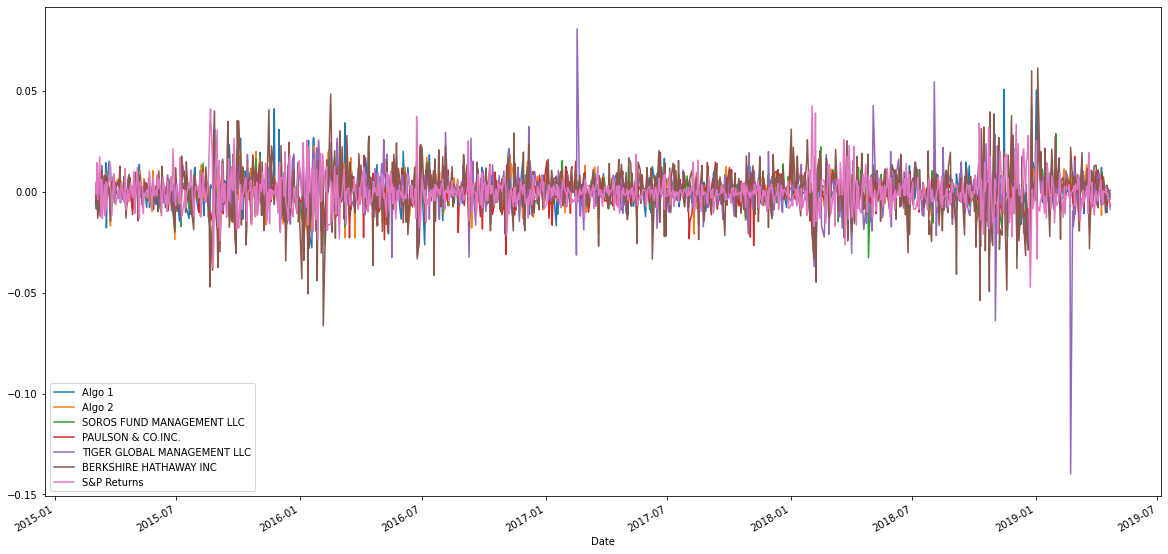

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

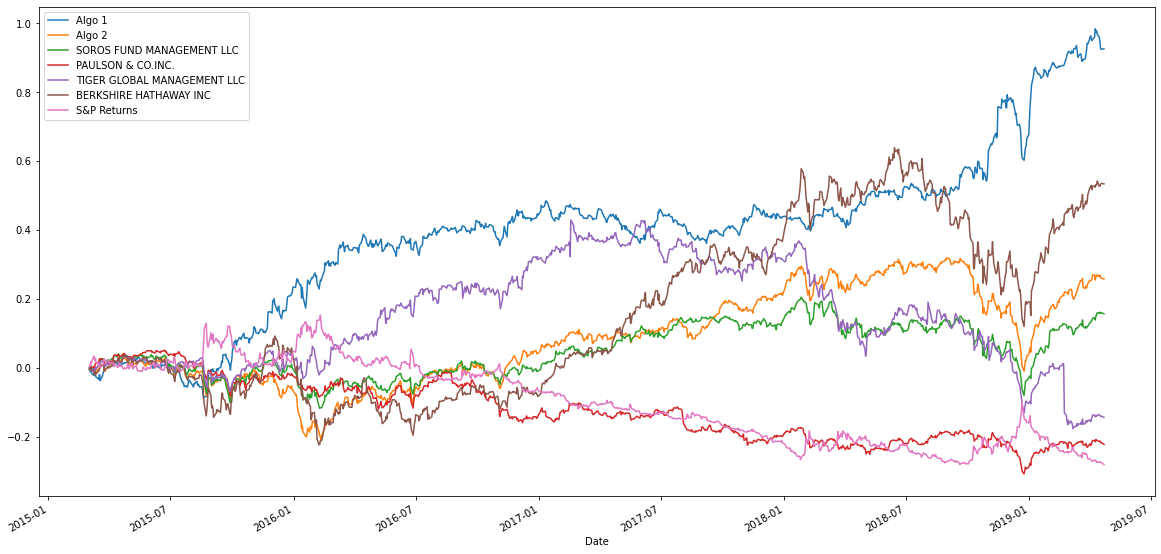

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

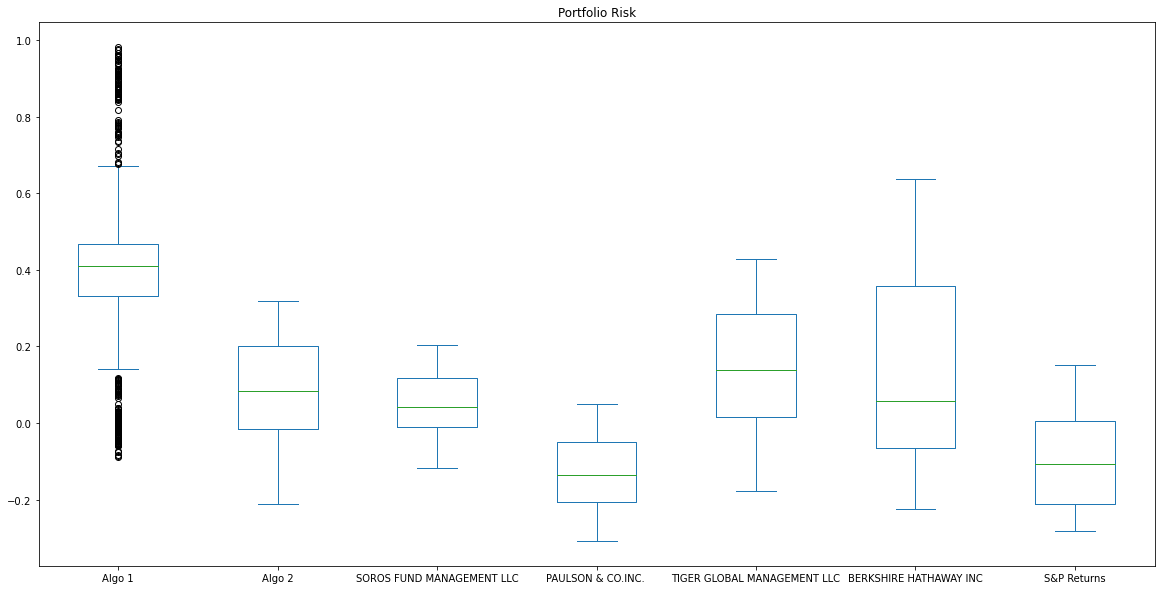

In [17]:
# Box plot to visually show risk
cumulative_returns.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_standard_dev = cumulative_returns.std().sort_values(ascending=False)
daily_standard_dev

BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 2                         0.131642
S&P Returns                    0.114846
PAULSON & CO.INC.              0.088447
SOROS FUND MANAGEMENT LLC      0.073187
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500, calculated previously on prior step
daily_standard_dev["S&P Returns"]
# Determine which portfolios are riskier than the S&P 500
riskier_than_SP500 =[daily_standard_dev > daily_standard_dev["S&P Returns"]]
riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 Algo 1                          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 S&P Returns                    False
 PAULSON & CO.INC.              False
 SOROS FUND MANAGEMENT LLC      False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_dev = daily_standard_dev *np.sqrt(252)
annualized_standard_dev.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 2                         2.089756
S&P Returns                    1.823124
PAULSON & CO.INC.              1.404053
SOROS FUND MANAGEMENT LLC      1.161806
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation (21 Day)'}, xlabel='Date'>

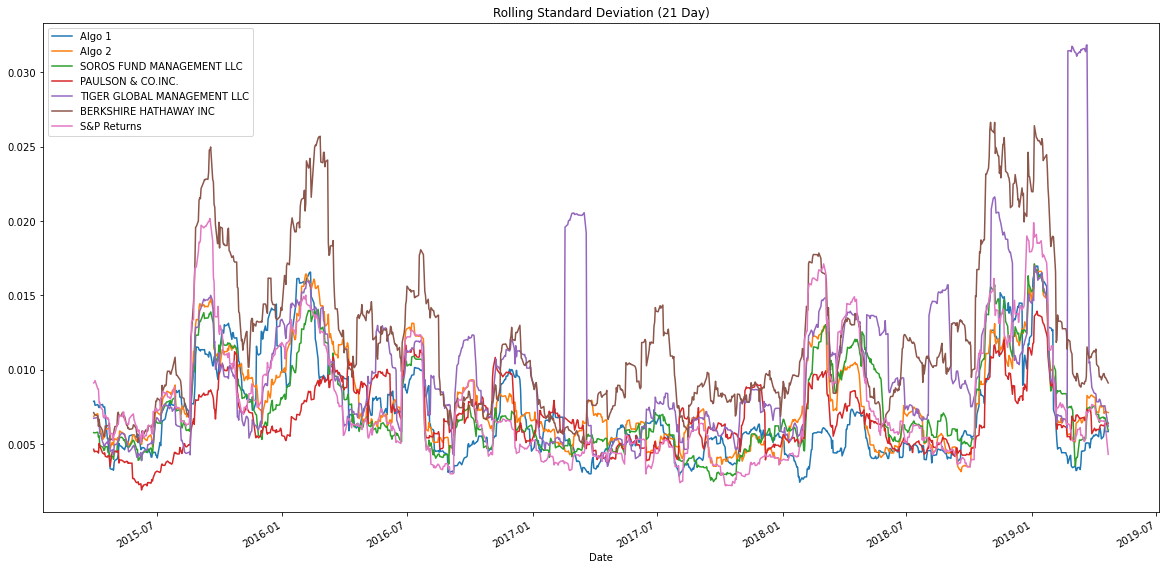

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

combined_df.rolling(window=21).std().plot(title="Rolling Standard Deviation (21 Day)", figsize=(20,10))


### Calculate and plot the correlation

In [22]:
# Calculate the correlation

# Display de correlation matrix
correlation = combined_df.corr()
correlation



,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Returns
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574
PAULSON & CO.INC.,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505
BERKSHIRE HATHAWAY INC,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856
S&P Returns,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1 vs. S&P 500 Returns'}, xlabel='Date'>

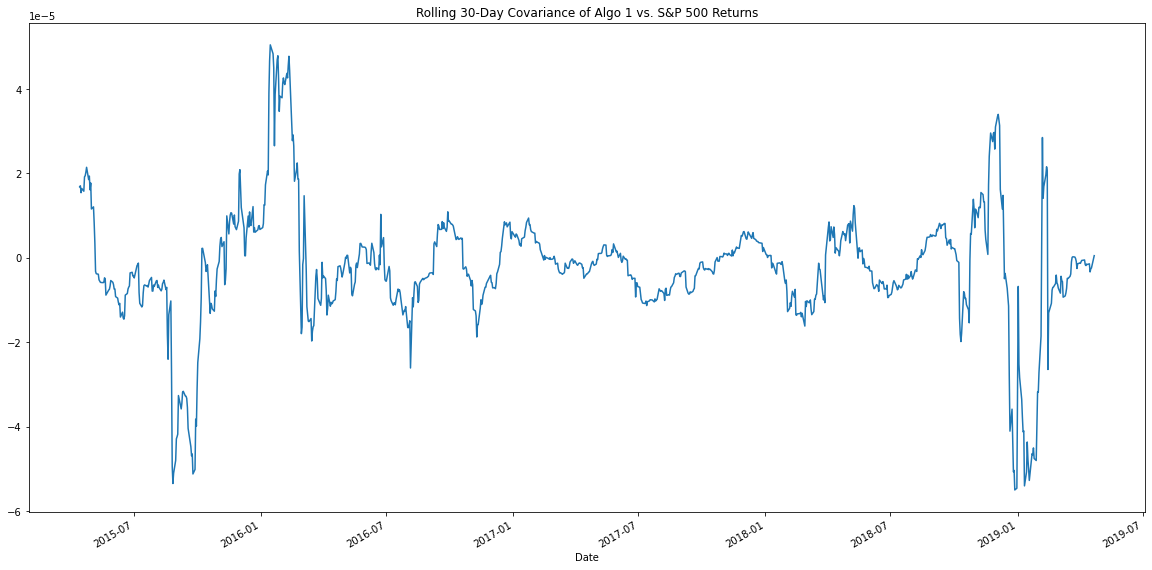

In [23]:
# Calculate covariance of a single portfolio
algo_1_cov = combined_df['Algo 1'].cov(combined_df["S&P Returns"])
algo_1_cov
# Calculate variance of S&P 500
variance = combined_df["S&P Returns"].var()
variance
# Computing beta
algo_1_beta = algo_1_cov / variance
algo_1_beta
# Plot beta trend
rolling_covariance = combined_df['Algo 1'].rolling(window=30).cov(combined_df["S&P Returns"])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 1 vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'EWA'}, xlabel='Date'>

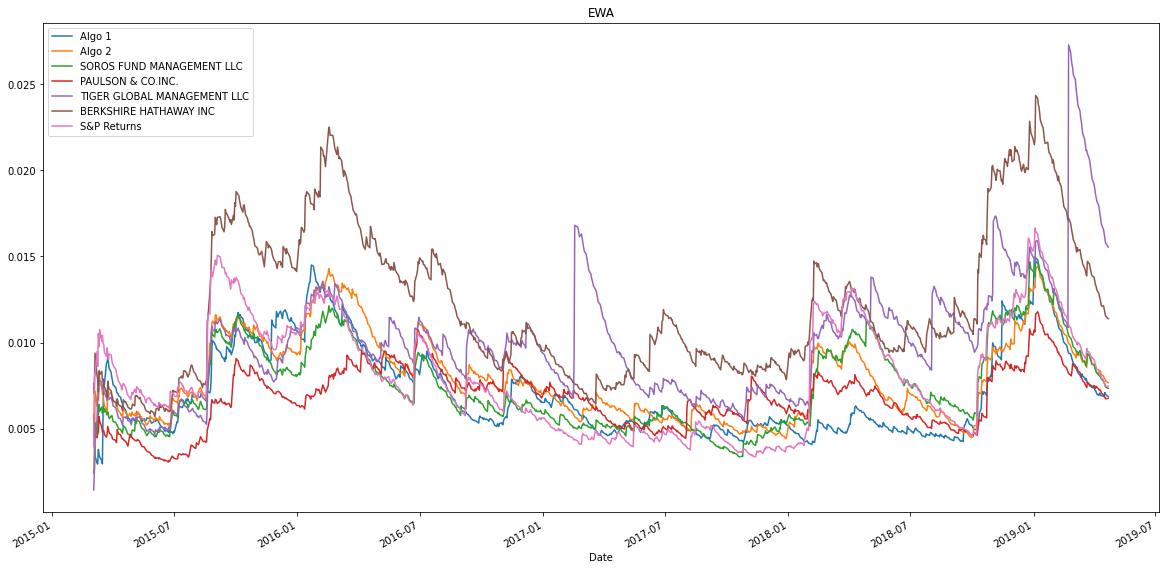

In [24]:
# Use `ewm` to calculate the rolling window
ewma = combined_df.ewm(halflife=21, adjust=True).std().plot(title="EWA", figsize=(20, 10))
ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe

Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P Returns                   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

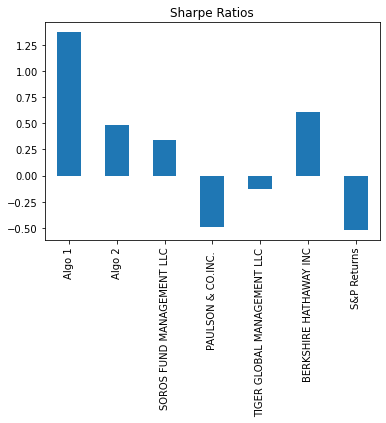

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algos outperformed. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_data = Path("resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.columns = ["AAPL"]
aapl_df

,AAPL
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [28]:
# Reading data from 2nd stock
goog_data = Path("resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_df.columns = ["GOOG"]
goog_df

,GOOG
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [29]:
# Reading data from 3rd stock
cost_data = Path("resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
cost_df.columns = ["COST"]
cost_df

,COST
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [30]:
# Combine all stocks in a single DataFrame
combined_df_per = pd.concat([aapl_df, goog_df, cost_df], axis="columns", join="inner")
combined_df_per

,AAPL,GOOG,COST
Date,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [ ]:
# Reset Date index
# Not needed with path taken

In [ ]:
# Reorganize portfolio data by having a column per symbol
# Taken care of in prior step

In [31]:
# Calculate daily returns
daily_returns = combined_df_per.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True) 
# Display sample data
daily_returns.head()

,AAPL,GOOG,COST
Date,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([portfolio_returns, combined_df], axis="columns", join="inner")
combined_df = combined_df.rename(columns={0: 'Personal Portfolio Returns'})
combined_df.tail()


,Personal Portfolio Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Returns
Date,,,,,,,,
2018-05-17,0.006112,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-16,0.001618,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-15,-0.009283,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-14,0.010216,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.006889
2018-05-11,-0.000012,0.000358,0.000281,-0.004717,0.000982,0.002624,-0.004125,-0.000883


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized `std`
volatility = combined_df.std() * np.sqrt(252)
volatility

Personal Portfolio Returns     0.213137
Algo 1                         0.133645
Algo 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
S&P Returns                    0.152147
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation (21 Day)'}, xlabel='Date'>

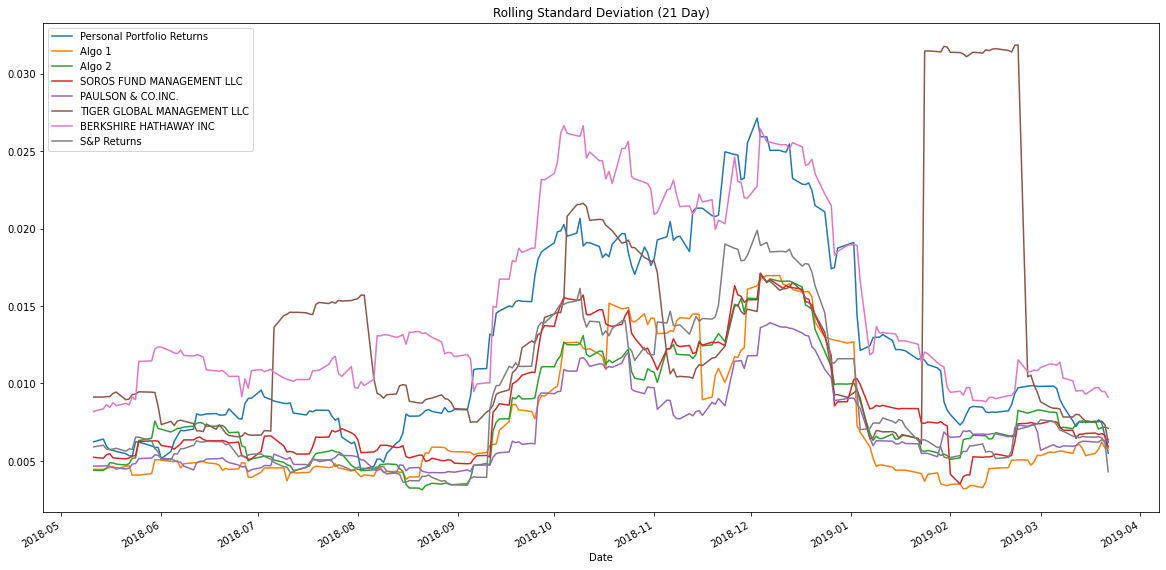

In [38]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_df.rolling(window=21).std().plot(title="Rolling Standard Deviation (21 Day)", figsize=(20,10))

### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation

,Personal Portfolio Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P Returns
Personal Portfolio Returns,1.000000,0.073296,0.039910,0.061503,0.025680,0.036047,0.006755,0.869976
Algo 1,0.073296,1.000000,0.364440,0.336890,0.360668,0.113568,0.326025,-0.054454
Algo 2,0.039910,0.364440,1.000000,0.861989,0.783856,0.408381,0.781894,-0.042549
SOROS FUND MANAGEMENT LLC,0.061503,0.336890,0.861989,1.000000,0.791031,0.476938,0.816190,-0.028091
PAULSON & CO.INC.,0.025680,0.360668,0.783856,0.791031,1.000000,0.484917,0.650132,-0.059893
TIGER GLOBAL MANAGEMENT LLC,0.036047,0.113568,0.408381,0.476938,0.484917,1.000000,0.323931,0.005812
BERKSHIRE HATHAWAY INC,0.006755,0.326025,0.781894,0.816190,0.650132,0.323931,1.000000,-0.038751
S&P Returns,0.869976,-0.054454,-0.042549,-0.028091,-0.059893,0.005812,-0.038751,1.000000


<AxesSubplot:>

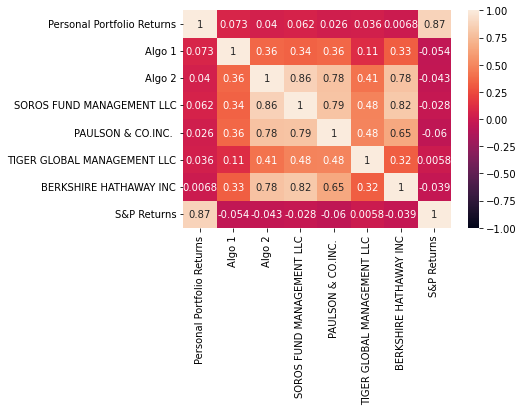

In [44]:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

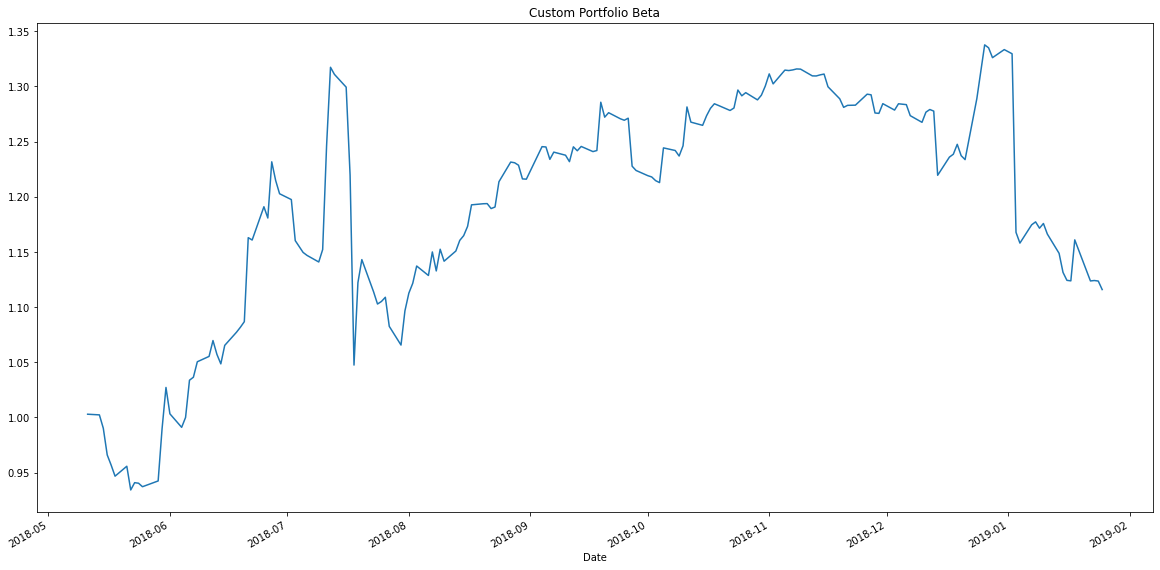

In [49]:
# Calculate and plot Beta
custom_beta = combined_df['Personal Portfolio Returns'].rolling(window=60).cov(combined_df['S&P Returns'])
custom_beta
variance_SP500 = combined_df['S&P Returns'].rolling(window=60).var()
variance_SP500

beta = custom_beta / variance_SP500
beta_plot = beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
combined_df_sharpe = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
combined_df_sharpe

Personal Portfolio Returns    -0.613547
Algo 1                         1.999866
Algo 2                         0.009467
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
S&P Returns                   -0.432942
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

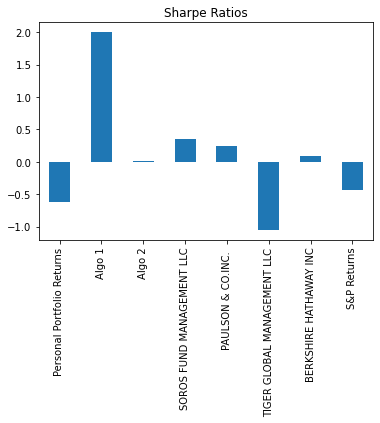

In [51]:
# Visualize the sharpe ratios as a bar plot
combined_df_sharpe.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Our portifilio has a high degree of risk/volitiliy for its return